# Explore here

In [1]:
# Your code here
import pandas as pd

df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
df_raw.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
df_raw.info()
df_raw.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(1338, 7)

In [3]:
df_raw.duplicated().sum()

np.int64(1)

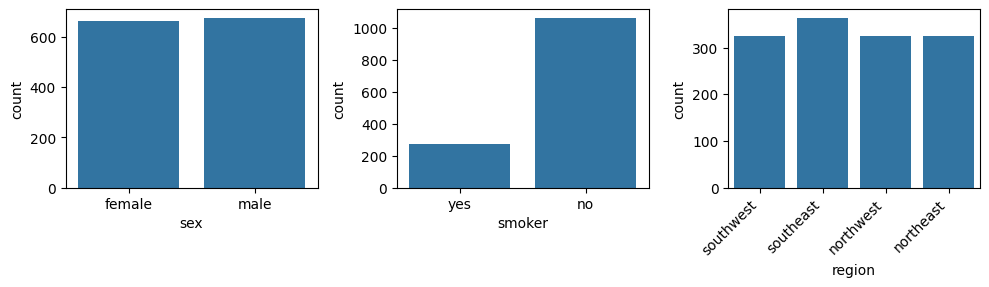

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

categoricas = ['sex', 'smoker', 'region']

fig, axis = plt.subplots(1, 3, figsize = (10,3))

for i, categoria in enumerate(categoricas):
    sns.countplot(ax=axis[i], data=df_raw[categoricas], x=categoria)
    if categoria == 'region':
        plt.setp(axis[i].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()

- Cantidad de hombres/mujeres similar
- La mayoría no fuma
- No hay un patrón definido de residencia de los beneficiarios

In [5]:
numericas = df_raw.describe().columns
numericas_list = numericas.tolist()
numericas_list

['age', 'bmi', 'children', 'charges']

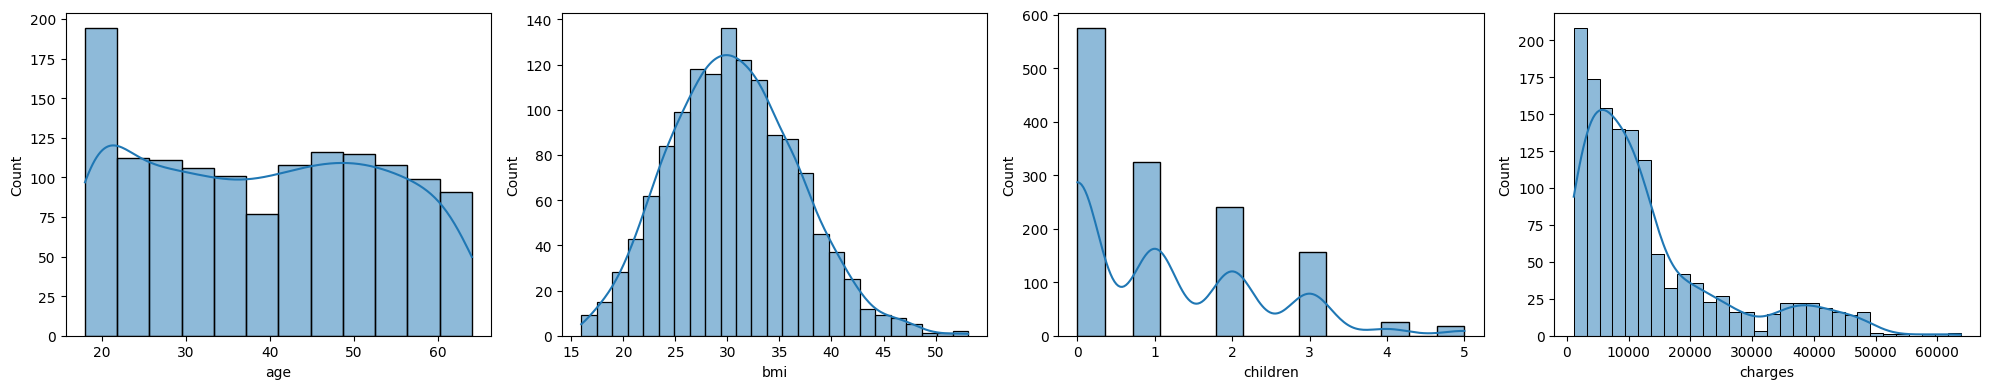

In [6]:
fig, axis = plt.subplots(1, 4, figsize = (20,4))

for i, num in enumerate(numericas_list):
    sns.histplot(ax=axis[i], data=df_raw[numericas_list], x=num, kde=True)

plt.tight_layout()

In [7]:
df_raw.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


- age: cantidad similar en cada rango etario. Media similar a mediana.
- bmi: índice de masa corporal tiene distribución normal. Media similar a mediana
- children: la mayoría no tiene hijos, pero en promedio tienen 1 (media similar a mediana)
- charges: es la variable que más dispersión presenta entre las numéricas (altos outliers). Se encuentra sesgada hacia la izquierda, con una alta desviación estandar. La mayoría paga una prima entre 1.122-16.640 USD.


In [8]:
df_raw.to_csv('../data/raw/df_raw.csv')
df_corr = df_raw.copy()
df_corr

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [9]:
categoricas_norm =[]

for columna in categoricas:
    nueva_columna = columna + '_norm'
    df_corr[nueva_columna] = pd.factorize(df_corr[columna])[0]
    categoricas_norm.append(nueva_columna)
df_corr

,age,sex,bmi,children,smoker,region,charges,sex_norm,smoker_norm,region_norm
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,1,2
1334,18,female,31.920,0,no,northeast,2205.98080,0,1,3
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,1
1336,21,female,25.800,0,no,southwest,2007.94500,0,1,0


In [10]:
categoricas_norm

['sex_norm', 'smoker_norm', 'region_norm']

In [11]:
variables = categoricas_norm + numericas_list
variables

['sex_norm', 'smoker_norm', 'region_norm', 'age', 'bmi', 'children', 'charges']

<Axes: >

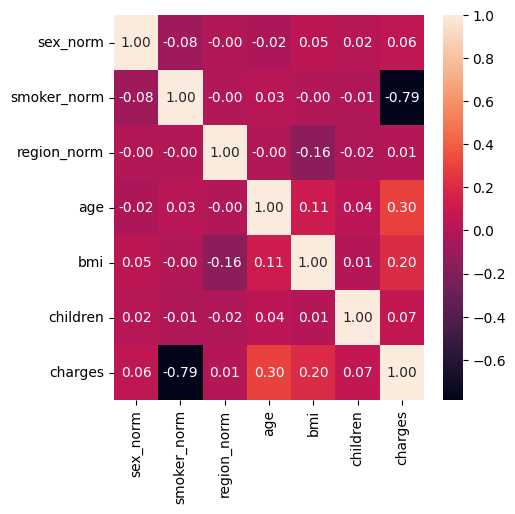

In [12]:
fig, axis = plt.subplots(figsize = (5, 5))

sns.heatmap(df_corr[variables].corr(), annot = True, fmt = ".2f")

In [13]:
df_corr.drop(['region_norm', 'region'], axis=1, inplace=True)
df_corr

,age,sex,bmi,children,smoker,charges,sex_norm,smoker_norm
0,19,female,27.900,0,yes,16884.92400,0,0
1,18,male,33.770,1,no,1725.55230,1,1
2,28,male,33.000,3,no,4449.46200,1,1
3,33,male,22.705,0,no,21984.47061,1,1
4,32,male,28.880,0,no,3866.85520,1,1
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,1,1
1334,18,female,31.920,0,no,2205.98080,0,1
1335,18,female,36.850,0,no,1629.83350,0,1
1336,21,female,25.800,0,no,2007.94500,0,1


In [14]:
df_corr.to_csv('../data/interim/df_corr.csv')

In [15]:
variables_condrop = df_corr.describe().columns.tolist()
variables_condrop

['age', 'bmi', 'children', 'charges', 'sex_norm', 'smoker_norm']

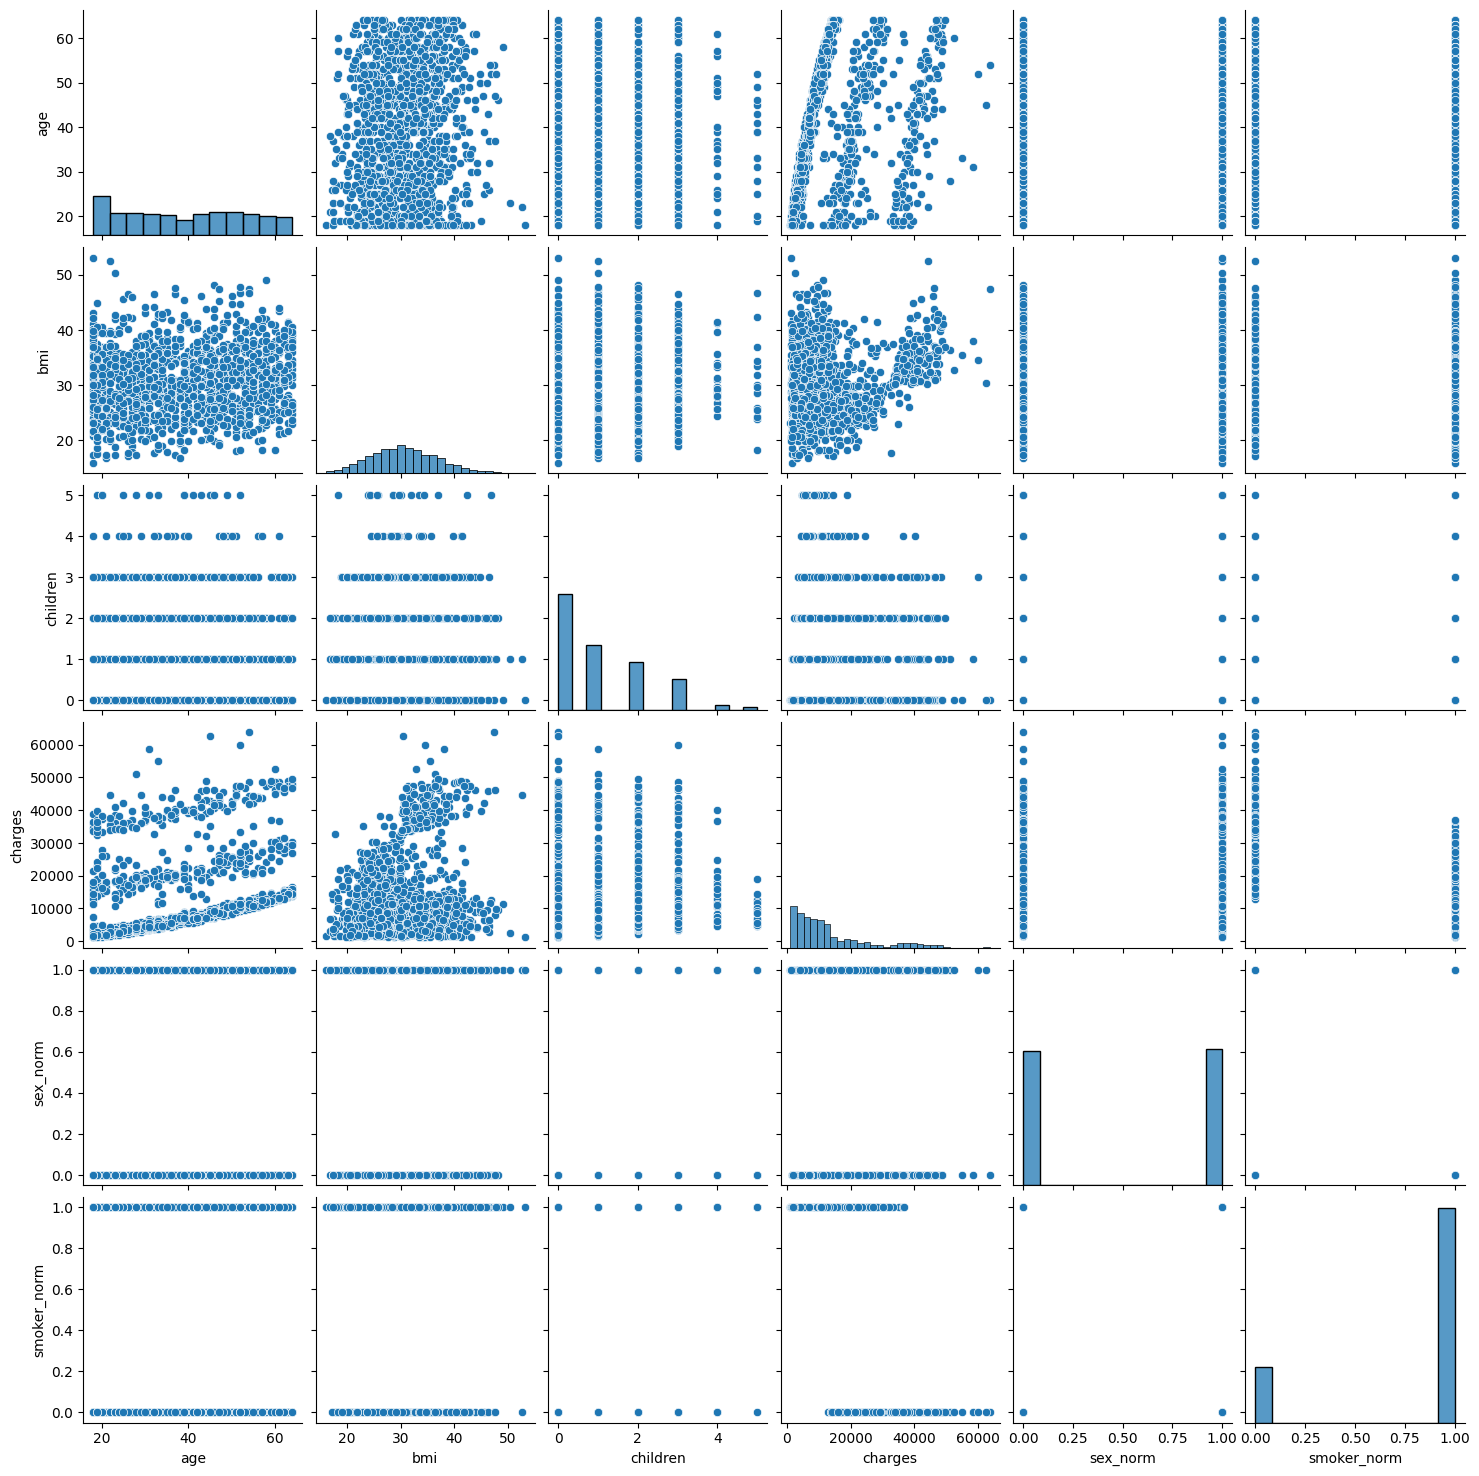

In [16]:
sns.pairplot(df_corr[variables_condrop])

**INGENIERÍA DE CARACTERÍSTICAS**

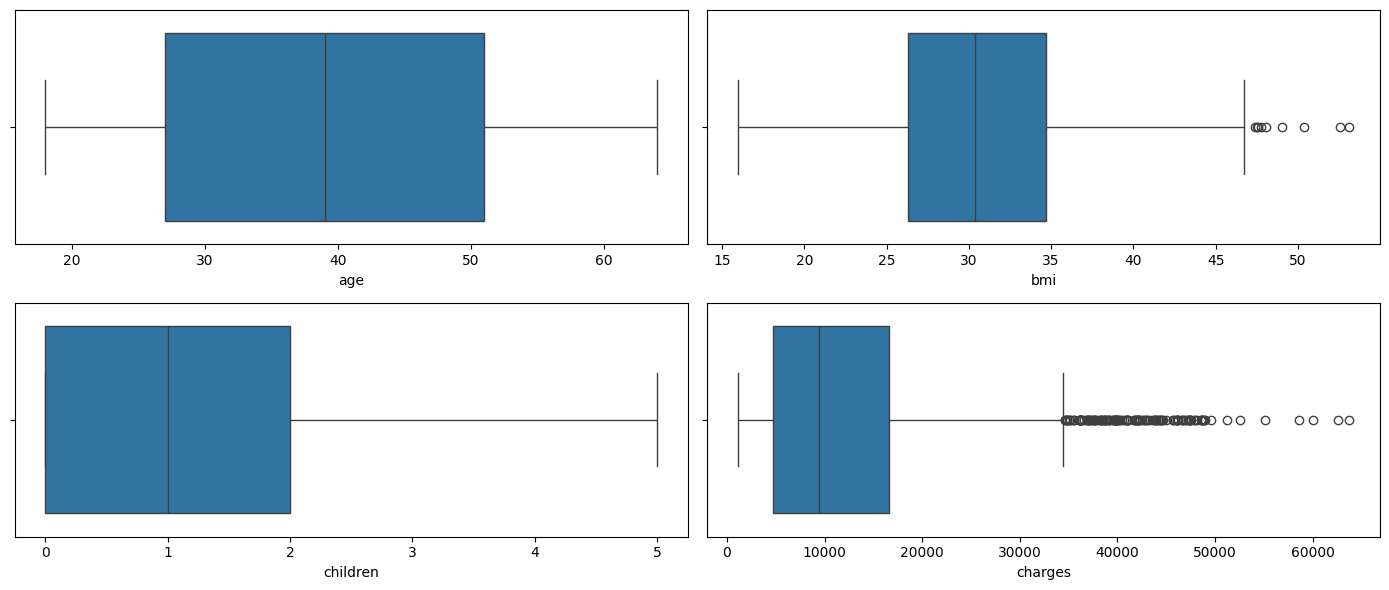

In [17]:
fig, axis = plt.subplots(2, 2, figsize = (14, 6))

for i, num in enumerate(numericas_list):
    row, col = i // 2, i % 2
    sns.boxplot(ax=axis[row,col], data=df_corr[numericas_list], x=num)

plt.tight_layout()
plt.show()

In [18]:
def analisis_ric(columna, df):
    estadisticas = df[columna].describe()
    ric = estadisticas['75%'] - estadisticas['25%']
    lim_sup = estadisticas['75%'] + 1.5*ric
    lim_inf = estadisticas['25%'] - 1.5*ric
    print(f'{columna}   lim_inferior: {lim_inf}, lim_superior: {lim_sup}')

In [19]:
df_corr2 = df_corr.copy()


In [20]:
analisis_ric('bmi', df_corr2)

bmi   lim_inferior: 13.7, lim_superior: 47.290000000000006


In [21]:
(df_corr2['bmi'] > 50).sum()

np.int64(3)

In [22]:
print(f'df sin eliminar registros de bmi: {df_corr2.shape}')
df_corr2 = df_corr2[df_corr2['bmi']<= 50]
print(f'df con registros eliminados de bmi: {df_corr2.shape}')

df sin eliminar registros de bmi: (1338, 8)
df con registros eliminados de bmi: (1335, 8)


In [ ]:
analisis_ric('charges', df_corr2)

charges   lim_inferior: -13066.415245, lim_superior: 34435.221275


In [ ]:
(df_corr2['charges'] > 40000).sum()

np.int64(78)

In [ ]:
# Calculé un promedio de outliers de 'charges' que están por encima del limite superior riq hasta 40000
# En otras palabras, designé 40000 como limite para outliers, y a los mayores a estos les imputaré el promedio antes mencionado.
media_limsup_40000 = df_corr[(df_corr['charges'] >= 34435.22) & (df_corr['charges'] <= 40000)]['charges'].mean()

In [ ]:
# hice una función para imputar el promedio antes calculado para los outliers de 'charges' mayores a 40000
replace_func = lambda x: x if x < 40000 else media_limsup_40000

In [ ]:
# imputar: con esto busqué disminuir la std de 'charges' y no perder tanta información eliminando outliers.
# me pareció una medida justa para no perder tanta información.

df_corr2['charges'] = df_corr2['charges'].apply(replace_func)
df_corr2

,age,sex,bmi,children,smoker,charges,sex_norm,smoker_norm
0,19,female,27.900,0,yes,16884.92400,0,0
1,18,male,33.770,1,no,1725.55230,1,1
2,28,male,33.000,3,no,4449.46200,1,1
3,33,male,22.705,0,no,21984.47061,1,1
4,32,male,28.880,0,no,3866.85520,1,1
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,1,1
1334,18,female,31.920,0,no,2205.98080,0,1
1335,18,female,36.850,0,no,1629.83350,0,1
1336,21,female,25.800,0,no,2007.94500,0,1


In [28]:
df_corr2.describe()

,age,bmi,children,charges,sex_norm,smoker_norm
count,1335.000000,1335.000000,1335.000000,1335.000000,1335.00000,1335.000000
mean,39.247940,30.615382,1.095880,12773.613483,0.50412,0.795506
std,14.038791,6.019913,1.206469,10804.792379,0.50017,0.403483
min,18.000000,15.960000,0.000000,1121.873900,0.00000,0.000000
25%,27.000000,26.255000,0.000000,4746.698450,0.00000,1.000000
50%,39.000000,30.360000,1.000000,9386.161300,1.00000,1.000000
75%,51.000000,34.600000,2.000000,16622.107580,1.00000,1.000000
max,64.000000,49.060000,5.000000,39983.425950,1.00000,1.000000


In [29]:
df_clean = df_corr2.copy()
df_clean.to_csv('../data/processed/df_limpio.csv')

In [30]:
df_clean

,age,sex,bmi,children,smoker,charges,sex_norm,smoker_norm
0,19,female,27.900,0,yes,16884.92400,0,0
1,18,male,33.770,1,no,1725.55230,1,1
2,28,male,33.000,3,no,4449.46200,1,1
3,33,male,22.705,0,no,21984.47061,1,1
4,32,male,28.880,0,no,3866.85520,1,1
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,1,1
1334,18,female,31.920,0,no,2205.98080,0,1
1335,18,female,36.850,0,no,1629.83350,0,1
1336,21,female,25.800,0,no,2007.94500,0,1


In [31]:
df_clean_fact = df_clean.copy()
df_clean_fact

,age,sex,bmi,children,smoker,charges,sex_norm,smoker_norm
0,19,female,27.900,0,yes,16884.92400,0,0
1,18,male,33.770,1,no,1725.55230,1,1
2,28,male,33.000,3,no,4449.46200,1,1
3,33,male,22.705,0,no,21984.47061,1,1
4,32,male,28.880,0,no,3866.85520,1,1
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,1,1
1334,18,female,31.920,0,no,2205.98080,0,1
1335,18,female,36.850,0,no,1629.83350,0,1
1336,21,female,25.800,0,no,2007.94500,0,1


In [32]:
df_clean_fact.drop(['sex', 'smoker'], axis=1, inplace=True)
df_clean_fact.to_csv('../data/processed/df_limpio_factorizado.csv')

In [33]:
df_clean_fact

,age,bmi,children,charges,sex_norm,smoker_norm
0,19,27.900,0,16884.92400,0,0
1,18,33.770,1,1725.55230,1,1
2,28,33.000,3,4449.46200,1,1
3,33,22.705,0,21984.47061,1,1
4,32,28.880,0,3866.85520,1,1
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,1
1334,18,31.920,0,2205.98080,0,1
1335,18,36.850,0,1629.83350,0,1
1336,21,25.800,0,2007.94500,0,1


In [34]:
from sklearn.model_selection import train_test_split

X = df_clean_fact.drop(['charges'], axis=1)
y = df_clean_fact['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [35]:
from sklearn.preprocessing import MinMaxScaler

predictoras = ['age', 'bmi', 'children', 'sex_norm', 'smoker_norm']

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = predictoras)
X_train_norm.to_csv('../data/processed/X_train_normalizados.csv', index=False)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = predictoras)
X_test_norm.to_csv('../data/processed/X_test_normalizados.csv', index=False)

X_train_norm.head()

,age,bmi,children,sex_norm,smoker_norm
1284,0.934783,0.614502,0.2,1.0,0.0
1113,0.217391,0.312840,0.6,0.0,1.0
967,0.565217,0.284139,0.2,1.0,1.0
598,0.543478,0.502719,0.4,1.0,1.0
170,0.978261,0.770695,0.0,1.0,1.0


In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
print(f'Los coeficientes del modelo son: {model.coef_}')
print(f'El intercepto del modelo es: {model.intercept_}')

Los coeficientes del modelo son: [   231.35473858    227.71990147    541.55349471   -264.23971895
 -20963.61641083]
El intercepto del modelo es: 12908.476921622949


In [38]:
y_pred = model.predict(X_test)

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

print(f'El MSE es: {mean_squared_error(y_pred, y_test)}')
print(f'El R2 es: {r2_score(y_pred, y_test)}')

El MSE es: 26773038.06076735
El R2 es: 0.7027497893341638
